In [1]:
import pandas as pd
import numpy as np


In [2]:
df_patient = pd.read_csv('data/patient_dataframe.csv')

In [3]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331762 entries, 0 to 331761
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   patientID                331762 non-null  object 
 1   numVisits                331762 non-null  int64  
 2   numProcedures            331762 non-null  int64  
 3   numContacts              331762 non-null  int64  
 4   cumulativeVisitDuration  331762 non-null  float64
 5   Age                      331762 non-null  float64
 6   Gender                   331762 non-null  float64
 7   Diagnosis                331762 non-null  object 
 8   PhysicalAppointments     331762 non-null  int64  
 9   HomeAppointments         331762 non-null  int64  
 10  VirtualAppointments      331762 non-null  int64  
 11  numAcute                 331762 non-null  int64  
 12  numPlanned               331762 non-null  int64  
 13  numRegularOutpatient     331762 non-null  int64  
 14  numA

In [4]:
df_patient.head()

,patientID,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,Diagnosis,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,Z4115614,6,6,6,342.0,0.0,1.0,"{'DZ001', 'DQ549', 'DQ540'}",5,0,1,0,6,6,0,0
1,Z4119225,6,3,6,260.0,0.0,1.0,{'DZ001'},6,0,0,0,6,6,0,0
2,Z4127033,17,11,17,1547.0,0.0,1.0,"{'DZ001', 'DK628', 'DP599', 'DZ033A', 'DZ135C'...",14,1,2,0,17,17,0,0
3,Z4139519,3,3,3,120.0,0.0,1.0,{'DZ001'},3,0,0,0,3,3,0,0
4,Z4146746,4,3,4,180.0,0.0,1.0,{'DZ001'},3,1,0,0,4,4,0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

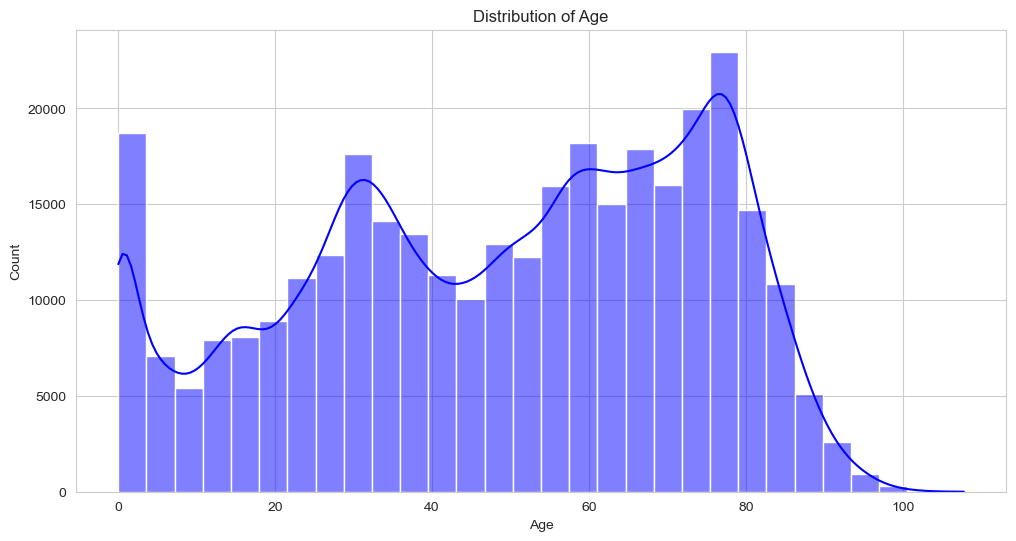

In [6]:
df = df_patient.copy()

# Set style
sns.set_style("whitegrid")

# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

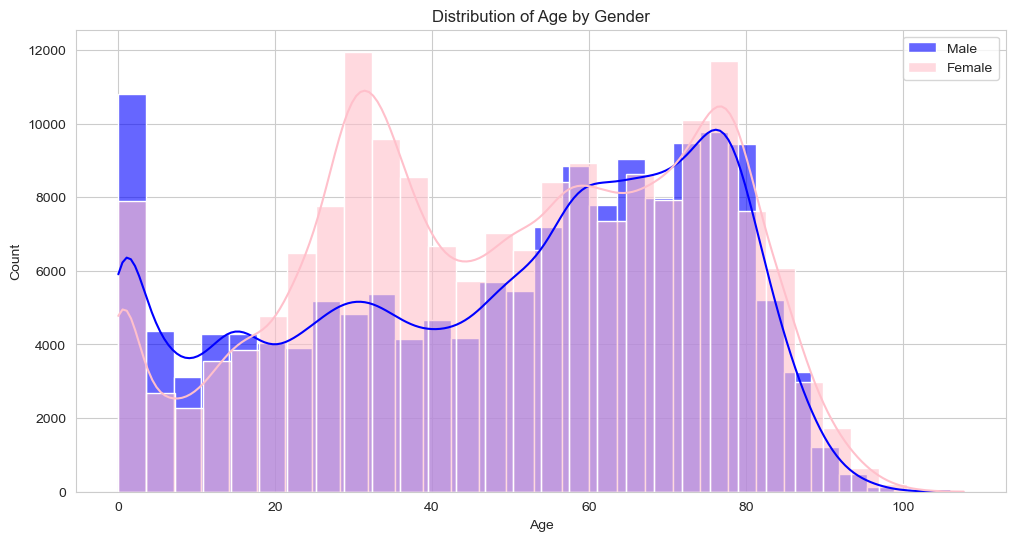

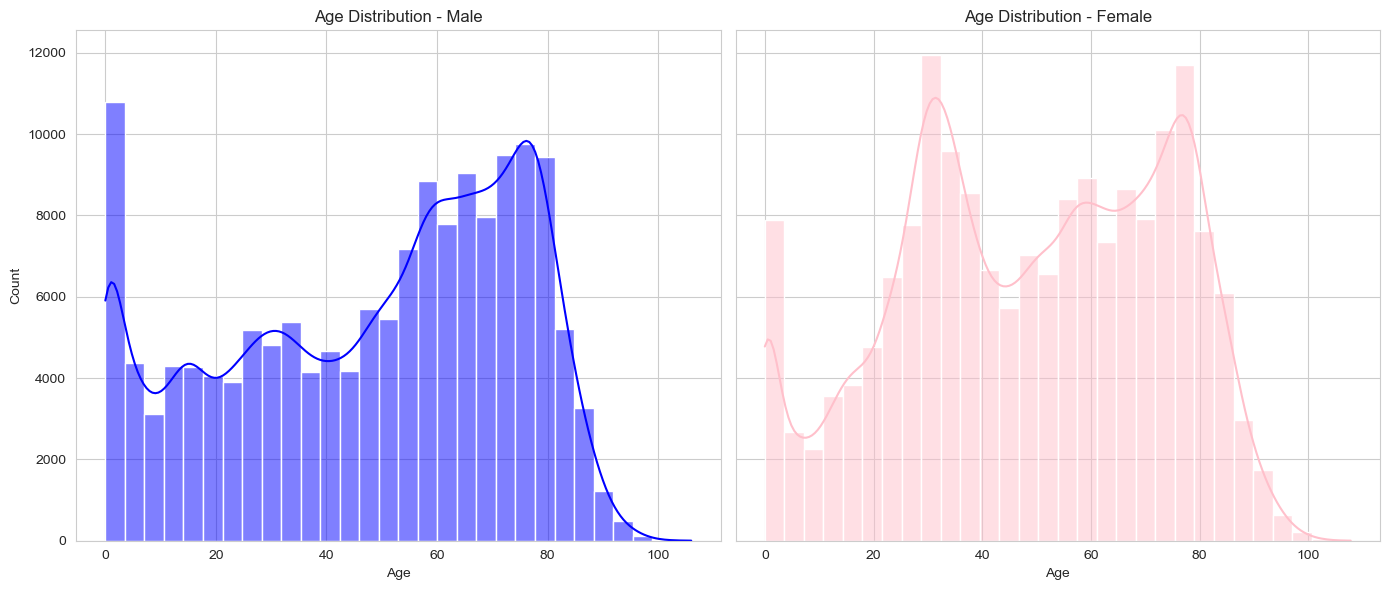

In [7]:
# Distribution of Age by Gender
plt.figure(figsize=(12, 6))
sns.histplot(df_patient[df_patient['Gender'] == 1]['Age'], bins=30, kde=True, color='blue', label='Male', alpha=0.6)
sns.histplot(df_patient[df_patient['Gender'] == 0]['Age'], bins=30, kde=True, color='pink', label='Female', alpha=0.6)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# Separate Plots for Males and Females
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(df_patient[df_patient['Gender'] == 1]['Age'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Age Distribution - Male")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

sns.histplot(df_patient[df_patient['Gender'] == 0]['Age'], bins=30, kde=True, color='pink', ax=axes[1])
axes[1].set_title("Age Distribution - Female")
axes[1].set_xlabel("Age")

plt.tight_layout()
plt.show()


C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\2857216844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'].astype(str), palette='coolwarm')


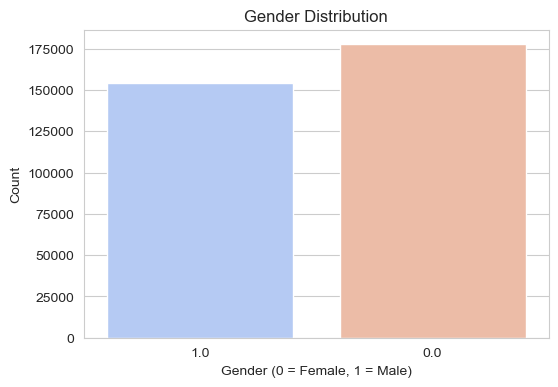

In [8]:
#Geneder distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'].astype(str), palette='coolwarm')
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

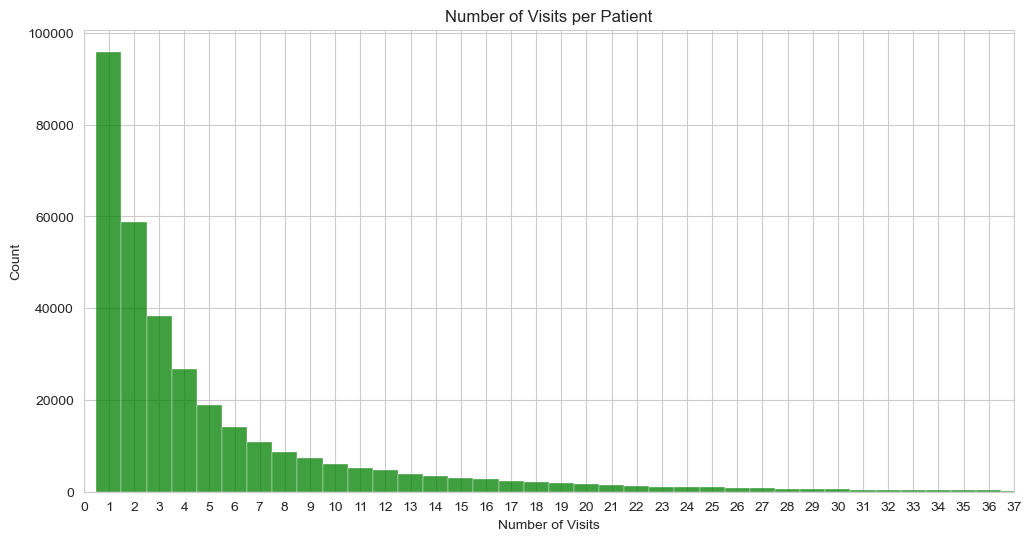

In [9]:
# Number of Visits per Patient
plt.figure(figsize=(12, 6))
sns.histplot(df_patient['numVisits'], bins=int(df_patient['numVisits'].max()), kde=False, color='green', discrete=True)
plt.title("Number of Visits per Patient")
plt.xlabel("Number of Visits")
plt.ylabel("Count")
plt.xlim(0, df_patient['numVisits'].quantile(0.99))  # Remove outliers
plt.xticks(range(0, int(df_patient['numVisits'].quantile(0.99)) + 1, 1))  # Ensure x-axis shows every integer count
plt.show()


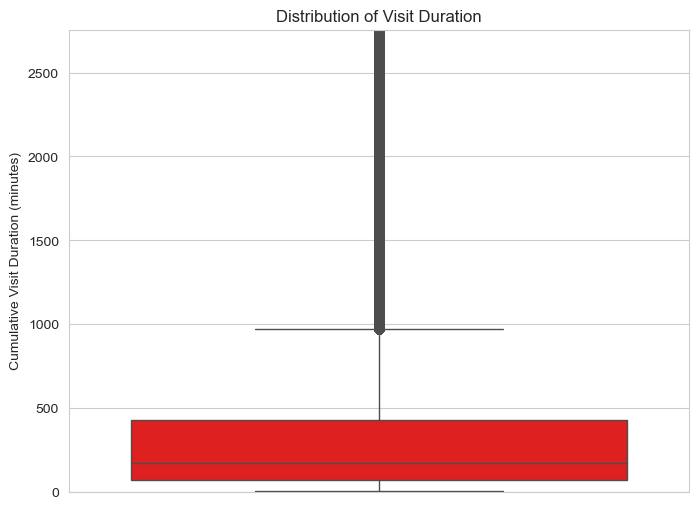

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['cumulativeVisitDuration'], color='red')
plt.title("Distribution of Visit Duration")
plt.ylabel("Cumulative Visit Duration (minutes)")
plt.ylim(0, df['cumulativeVisitDuration'].quantile(0.99))  # Remove outliers
plt.show()

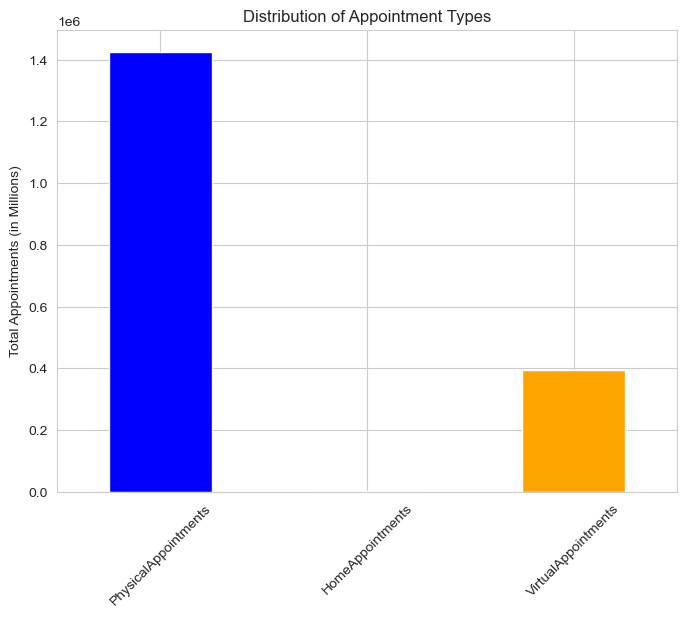

In [11]:
#Appointment Patterns
appointment_types = ['PhysicalAppointments', 'HomeAppointments', 'VirtualAppointments']
df[appointment_types].sum().plot(kind='bar', figsize=(8, 6), color=['blue', 'green', 'orange'])
plt.title("Distribution of Appointment Types")
plt.ylabel("Total Appointments (in Millions)")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Check the count of HomeAppointments
home_appointments_count = df_patient['HomeAppointments'].sum()
print(f"Total Home Appointments: {home_appointments_count}")

Total Home Appointments: 2549


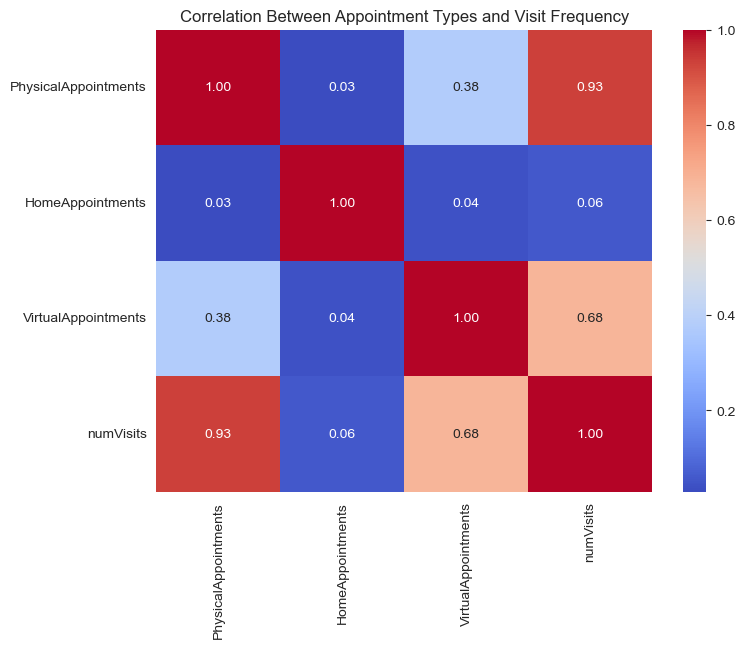

In [13]:
# Correlation between appointment type and numVisits
plt.figure(figsize=(8, 6))
sns.heatmap(df[appointment_types + ['numVisits']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Appointment Types and Visit Frequency")
plt.show()

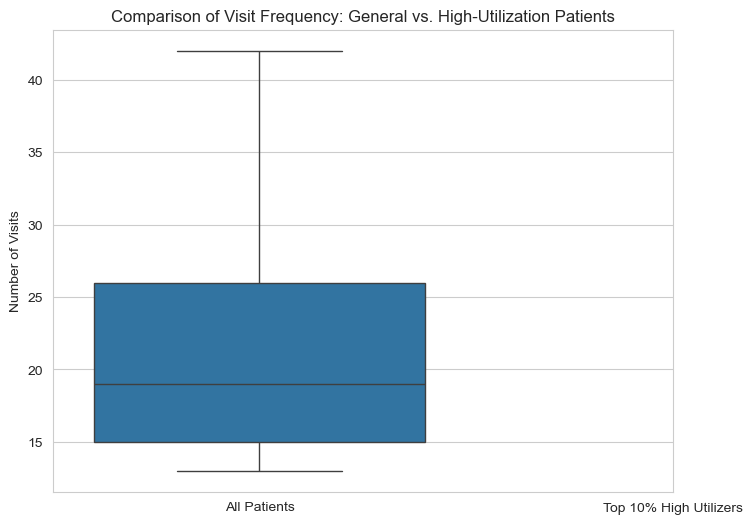

In [14]:
#High-Utilization Patients
threshold = df['numVisits'].quantile(0.90)  # Top 10% patients
high_utilization = df[df['numVisits'] >= threshold]

plt.figure(figsize=(8, 6))
sns.boxplot(data=[df['numVisits'], high_utilization['numVisits']], showfliers=False)
plt.xticks([0, 1], ["All Patients", "Top 10% High Utilizers"])
plt.title("Comparison of Visit Frequency: General vs. High-Utilization Patients")
plt.ylabel("Number of Visits")
plt.show()

In [15]:
# Load diagnosis dimension table
df_diagnosis = pd.read_csv('data/Translated diagnosis dimension table.csv')

In [16]:
df_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Diagnosis     19482 non-null  object
 1   Disease Name  19482 non-null  object
 2   Group 3       19481 non-null  object
 3   Group 2       19482 non-null  object
 4   Group 1       19482 non-null  object
dtypes: object(5)
memory usage: 761.1+ KB


In [17]:
df_diagnosis.head()

,Diagnosis,Disease Name,Group 3,Group 2,Group 1
0,DA00,Cholera,Infectious intestinal diseases,Infectious intestinal diseases,Certain infectious and parasitic diseases
1,DA000,Cholera caused by vibrio cholerae,Infectious intestinal diseases,Infectious intestinal diseases,Certain infectious and parasitic diseases
2,DA001,Cholera caused by vibrio cholerae eltor,Infectious intestinal diseases,Infectious intestinal diseases,Certain infectious and parasitic diseases
3,DA009,Cholera Uns,Infectious intestinal diseases,Infectious intestinal diseases,Certain infectious and parasitic diseases
4,DA01,Typhoid and paratypus,Infectious intestinal diseases,Infectious intestinal diseases,Certain infectious and parasitic diseases


In [18]:
# Remove rows where 'Diagnosis' contains 'nan' as a string before processing
df_patient = df_patient[~df_patient['Diagnosis'].astype(str).str.contains(r"\bnan\b", na=False)]

# Ensure Diagnosis column is in the correct format
df_patient['Diagnosis'] = df_patient['Diagnosis'].apply(lambda x: list(eval(x)) if isinstance(x, str) else x)

# Explode df_patient so each row has only one diagnosis
df_patient = df_patient.explode('Diagnosis')

# Merge df_patient with df_diagnosis to add all available diagnosis information
df_patient = df_patient.merge(df_diagnosis, on="Diagnosis", how="left") 



In [19]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497003 entries, 0 to 497002
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   patientID                497003 non-null  object 
 1   numVisits                497003 non-null  int64  
 2   numProcedures            497003 non-null  int64  
 3   numContacts              497003 non-null  int64  
 4   cumulativeVisitDuration  497003 non-null  float64
 5   Age                      497003 non-null  float64
 6   Gender                   497003 non-null  float64
 7   Diagnosis                497003 non-null  object 
 8   PhysicalAppointments     497003 non-null  int64  
 9   HomeAppointments         497003 non-null  int64  
 10  VirtualAppointments      497003 non-null  int64  
 11  numAcute                 497003 non-null  int64  
 12  numPlanned               497003 non-null  int64  
 13  numRegularOutpatient     497003 non-null  int64  
 14  numA

In [20]:
# Revert the explode operation: aggregate Diagnosis and Disease Name back into lists
df_patient = df_patient.groupby('patientID').agg({
    'numVisits': 'sum',
    'numProcedures': 'sum',
    'numContacts': 'sum',
    'cumulativeVisitDuration': 'sum',
    'Age': 'first',
    'Gender': 'first',
    'Diagnosis': lambda x: list(set(x.dropna())),  # Convert back to list format
    'PhysicalAppointments': 'sum',
    'HomeAppointments': 'sum',
    'VirtualAppointments': 'sum',
    'numAcute': 'sum',
    'numPlanned': 'sum',
    'numRegularOutpatient': 'sum',
    'numAcuteAmbulatory': 'sum',
    'numUnderObservation': 'sum',
    'Disease Name': lambda x: list(set(x.dropna())),  # Convert back to list format
    'Group 3': lambda x: list(set(x.dropna())),
    'Group 2': lambda x: list(set(x.dropna())),
    'Group 1': lambda x: list(set(x.dropna()))
}).reset_index()

In [21]:
df_patient.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331493 entries, 0 to 331492
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   patientID                331493 non-null  object 
 1   numVisits                331493 non-null  int64  
 2   numProcedures            331493 non-null  int64  
 3   numContacts              331493 non-null  int64  
 4   cumulativeVisitDuration  331493 non-null  float64
 5   Age                      331493 non-null  float64
 6   Gender                   331493 non-null  float64
 7   Diagnosis                331493 non-null  object 
 8   PhysicalAppointments     331493 non-null  int64  
 9   HomeAppointments         331493 non-null  int64  
 10  VirtualAppointments      331493 non-null  int64  
 11  numAcute                 331493 non-null  int64  
 12  numPlanned               331493 non-null  int64  
 13  numRegularOutpatient     331493 non-null  int64  
 14  numA

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\2381232338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_disease_visits, x='numVisits', y='Disease Name', palette='viridis')


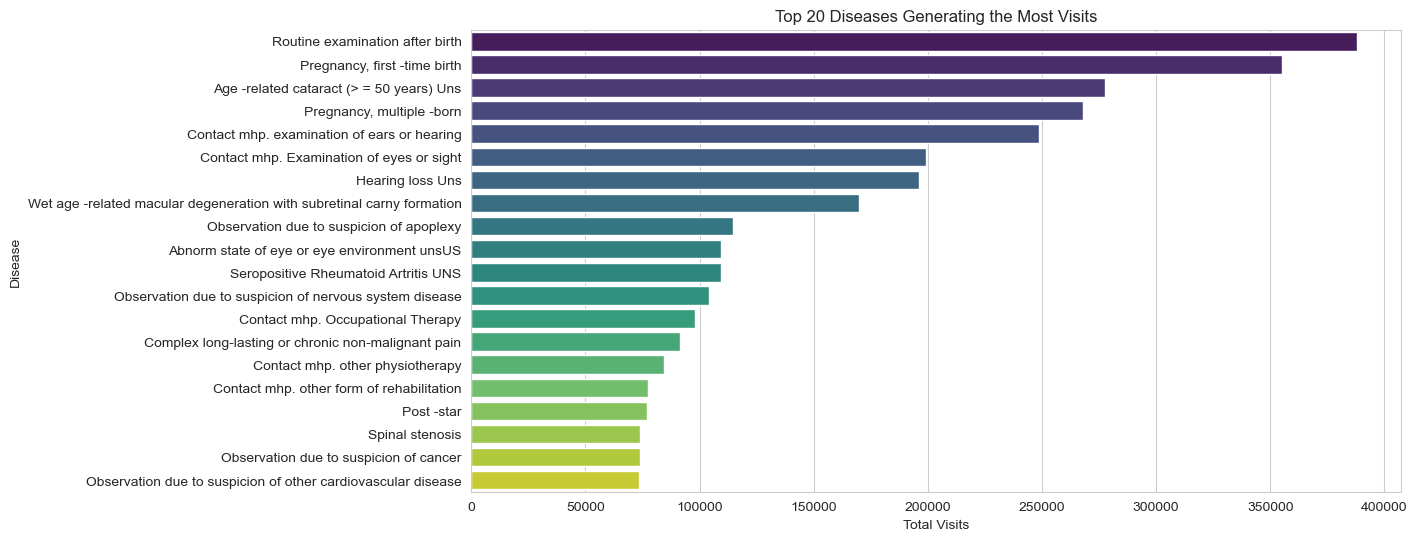

In [22]:
# Graph: Diseases vs. Total Visits
df_disease_visits = df_patient.explode('Disease Name').groupby('Disease Name')['numVisits'].sum().reset_index()
df_disease_visits = df_disease_visits.sort_values(by='numVisits', ascending=False).head(20)  # Top 20 diseases
plt.figure(figsize=(12, 6))
sns.barplot(data=df_disease_visits, x='numVisits', y='Disease Name', palette='viridis')
plt.title("Top 20 Diseases Generating the Most Visits")
plt.xlabel("Total Visits")
plt.ylabel("Disease")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\1261580050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_disease_time, x='Total Time Spent', y='Disease Name', palette='magma')


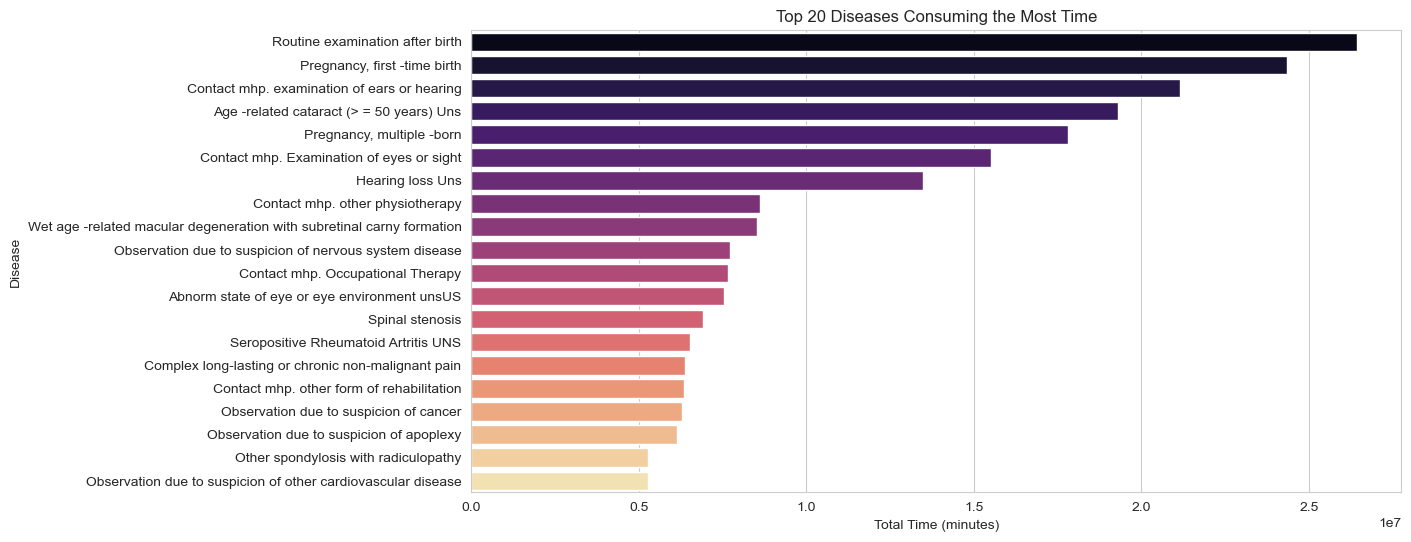

In [23]:
# Graph: Diseases vs. Cumulative Visit Duration
df_disease_time = df_patient.explode('Disease Name').groupby('Disease Name')['cumulativeVisitDuration'].sum().reset_index()
df_disease_time = df_disease_time.sort_values(by='cumulativeVisitDuration', ascending=False).head(20)  # Top 20 diseases by time
df_disease_time.rename(columns={'cumulativeVisitDuration': 'Total Time Spent'}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_disease_time, x='Total Time Spent', y='Disease Name', palette='magma')
plt.title("Top 20 Diseases Consuming the Most Time")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Disease")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\35784955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_group1_visits, x='numVisits', y='Group 1', palette='Reds')


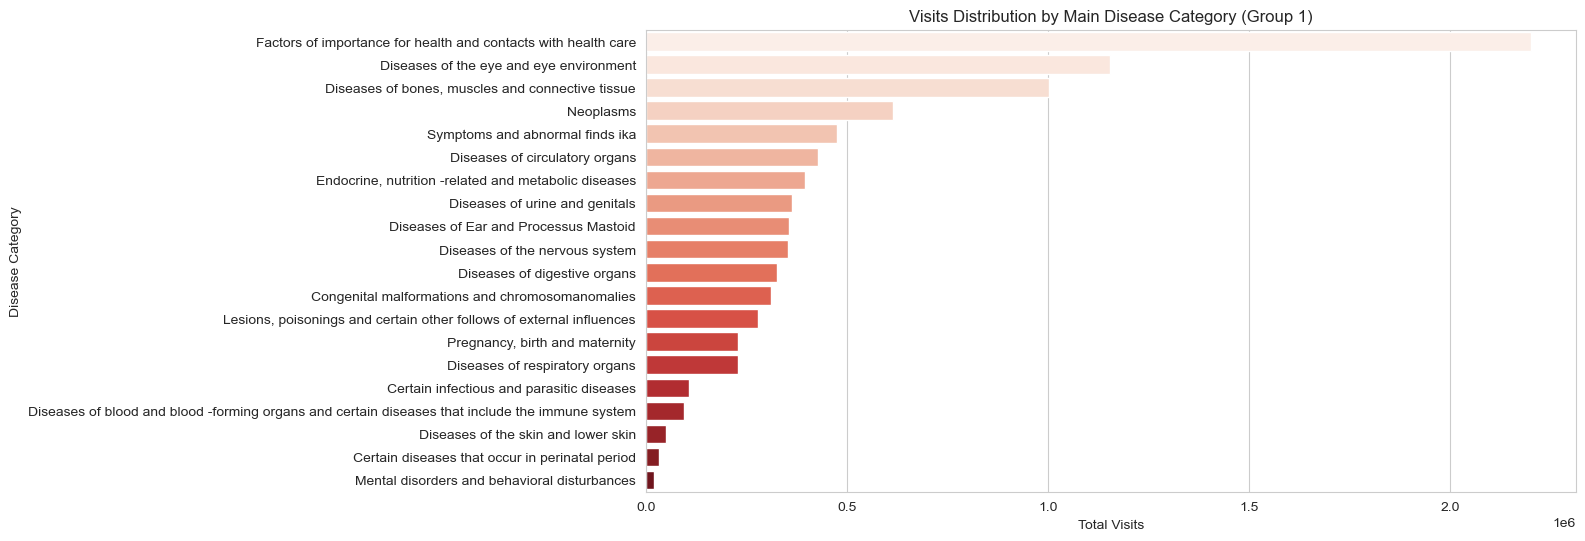

In [24]:
# Distribution of visits per disease category (Gruppe 1)
df_group1_visits = df_patient.explode('Group 1').groupby('Group 1')['numVisits'].sum().reset_index()
df_group1_visits = df_group1_visits.sort_values(by='numVisits', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_group1_visits, x='numVisits', y='Group 1', palette='Reds')
plt.title("Visits Distribution by Main Disease Category (Group 1)")
plt.xlabel("Total Visits")
plt.ylabel("Disease Category")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\391793583.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_repeat_visits.values, y=top_20_repeat_visits.index, palette="viridis")


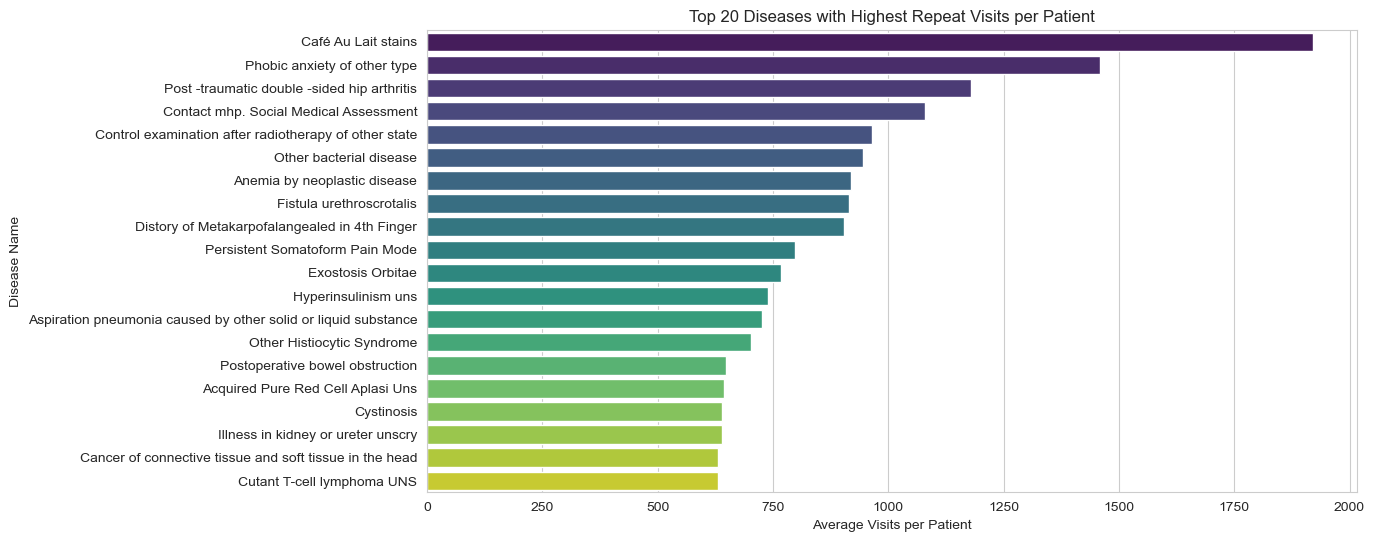

In [25]:
# Ensure 'Disease Name' is exploded so each row contains only one disease
df_exploded = df_patient.explode('Disease Name')

# Group by Disease Name and calculate average visits per patient
disease_repeat_visits = df_exploded.groupby('Disease Name')['numVisits'].mean().sort_values(ascending=False)

# Select the top 20 diseases with the highest repeat visits per patient
top_20_repeat_visits = disease_repeat_visits.head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_repeat_visits.values, y=top_20_repeat_visits.index, palette="viridis")
plt.xlabel("Average Visits per Patient")
plt.ylabel("Disease Name")
plt.title("Top 20 Diseases with Highest Repeat Visits per Patient")
plt.show()

✅ num_diagnoses column successfully created!
  patientID  num_diagnoses
0      Z100              1
1  Z1000004              1
2  Z1000010              2
3  Z1000018              1
4  Z1000021              1
Average Diagnoses per Patient (All Patients): 1.50
Average Diagnoses per Patient (High-Utilization Patients): 3.29


C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\1897346398.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['All Patients', 'High-Utilization Patients'], y=[avg_diagnoses_all, avg_diagnoses_high], palette=["blue", "red"])


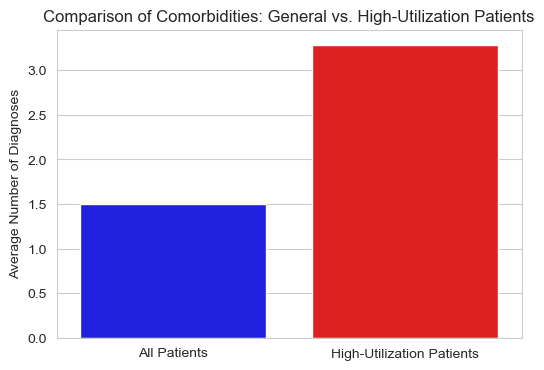

In [26]:
# Comorbidity Analysis (Do High-Visit Patients Have Multiple Diagnoses?)
# Convert Diagnosis column from string representation to actual lists
df_patient['Diagnosis'] = df_patient['Diagnosis'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create num_diagnoses column (counting the number of diagnoses per patient)
df_patient['num_diagnoses'] = df_patient['Diagnosis'].apply(lambda x: len(x) if isinstance(x, list) else 0)

print("✅ num_diagnoses column successfully created!")
print(df_patient[['patientID', 'num_diagnoses']].head())  # Preview results


# Define high-utilization threshold (top 10% of visit counts)
high_utilization_threshold = df_patient['numVisits'].quantile(0.90)

# Create a column identifying high-utilization patients
df_patient['High Utilization'] = df_patient['numVisits'] >= high_utilization_threshold

# Compare the average number of diagnoses for high vs. all patients
avg_diagnoses_all = df_patient['num_diagnoses'].mean()
avg_diagnoses_high = df_patient[df_patient['High Utilization']]['num_diagnoses'].mean()

# Print results
print(f"Average Diagnoses per Patient (All Patients): {avg_diagnoses_all:.2f}")
print(f"Average Diagnoses per Patient (High-Utilization Patients): {avg_diagnoses_high:.2f}")

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=['All Patients', 'High-Utilization Patients'], y=[avg_diagnoses_all, avg_diagnoses_high], palette=["blue", "red"])
plt.ylabel("Average Number of Diagnoses")
plt.title("Comparison of Comorbidities: General vs. High-Utilization Patients")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\193438502.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_utilization_diseases.values, y=high_utilization_diseases.index, ax=ax[0], palette="magma")
C:\Users\Nazareno\AppData\Local\Temp\ipykernel_1780\193438502.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_patients_diseases.values, y=all_patients_diseases.index, ax=ax[1], palette="Blues_r")


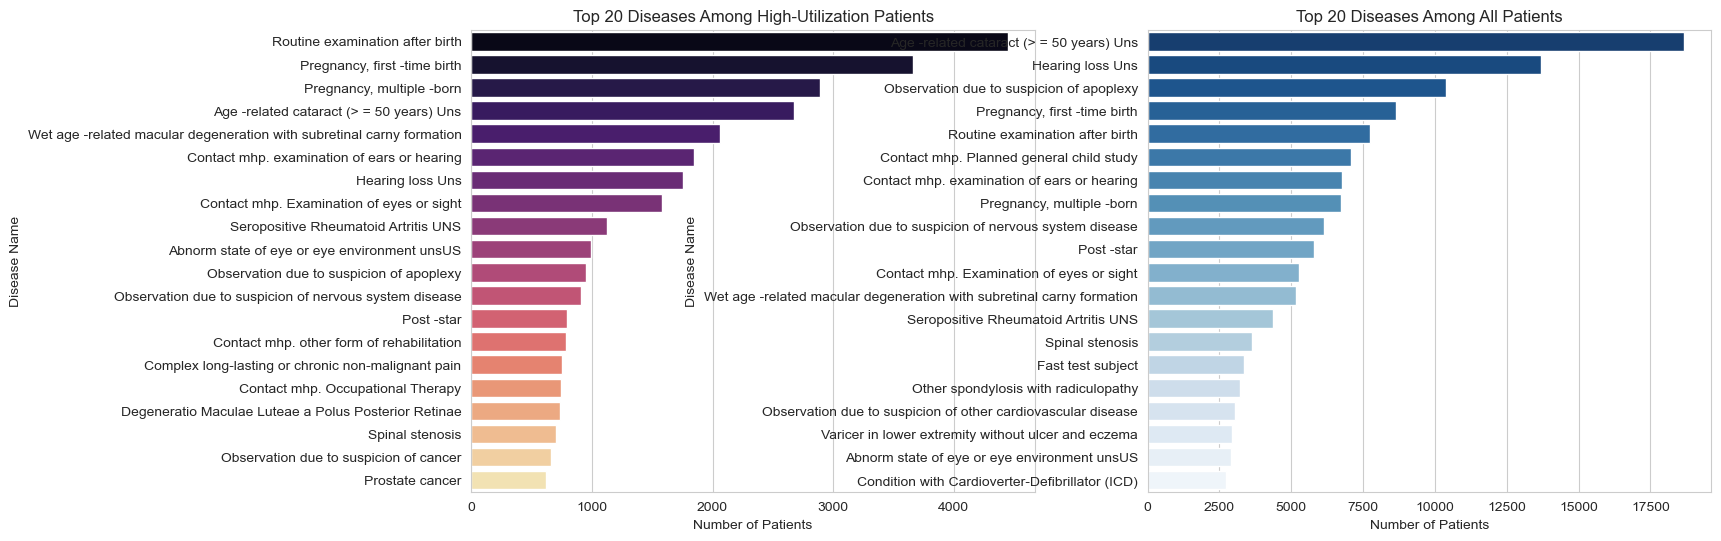

In [27]:
# Identify the Most Common Diseases Among High-Utilization Patients
# Count disease occurrences among high-utilization patients
high_utilization_diseases = df_patient[df_patient['High Utilization']]['Disease Name'].explode().value_counts().head(20)

# Count disease occurrences among all patients
all_patients_diseases = df_patient['Disease Name'].explode().value_counts().head(20)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=high_utilization_diseases.values, y=high_utilization_diseases.index, ax=ax[0], palette="magma")
ax[0].set_title("Top 20 Diseases Among High-Utilization Patients")
ax[0].set_xlabel("Number of Patients")

sns.barplot(x=all_patients_diseases.values, y=all_patients_diseases.index, ax=ax[1], palette="Blues_r")
ax[1].set_title("Top 20 Diseases Among All Patients")
ax[1].set_xlabel("Number of Patients")

plt.show()
